# Obesity data analysis

### 1. Importing and loading data set from csv file

In [222]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data/obesity_data.csv")

# Display first rows
df.head()


Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

### 2. Basic data analysis EDA

Missing values check (for categorical and numeric)

In [231]:
nulls = df.isnull().sum()
display(nulls)

nulls.to_csv(f"figures/tables/null_values.csv", index=True)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

#### 2.1 Numerical features:

In [234]:
numeric = df.describe(percentiles=[.05, .95])
display(numeric)

numeric.to_csv(f"figures/tables/numeric.csv", index=True)

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
5%       17.891428     1.548291    48.500000     1.523214     1.000000   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
95%      38.098070     1.850000   131.916152     3.000000     3.750881   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
5%        1.000000     0.000000     0.000000  
50%       2.000000     1.000000     0.625350  
95%       3.000000     2.677133     2.000000  
max       3.000000     3.000000     2.000000

#### 2.2 Categorical features analysis:

unique classes in each column:

In [229]:
unique = df.select_dtypes(include=['object']).nunique()
display(unique)

unique.to_csv(f"figures/tables/categoric_unique_classes.csv", index=True)

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64

proportion of the classes (in %)

In [ ]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Compute proportions for each category and save as CSV
for col in categorical_cols:

    proportions = pd.DataFrame(df[col].value_counts(normalize=True) * 100).rename(columns={col: "Percentage"})
    display(proportions)
    
    proportions.to_csv(f"figures/tables/proportions/{col}.csv", index=True)  # Save file with the column name
    


proportion
Gender            
Male     50.592136
Female   49.407864

proportion
family_history_with_overweight            
yes                              81.762198
no                               18.237802

proportion
FAVC            
yes    88.394126
no     11.605874

proportion
CAEC                  
Sometimes    83.609664
Frequently   11.463761
Always        2.510658
no            2.415917

proportion
SMOKE            
no       97.91568
yes       2.08432

proportion
SCC            
no    95.452392
yes    4.547608

proportion
CALC                  
Sometimes    66.366651
no           30.270014
Frequently    3.315964
Always        0.047371

proportion
MTRANS                           
Public_Transportation   74.846045
Automobile              21.648508
Walking                  2.652771
Motorbike                0.521080
Bike                     0.331596

proportion
NObeyesdad                     
Obesity_Type_I        16.627191
Obesity_Type_III      15.348176
Obesity_Type_II       14.069162
Overweight_Level_I    13.737565
Overweight_Level_II   13.737565
Normal_Weight         13.595452
Insufficient_Weight   12.884889

Visualization of proportion of each class for categorical features (for easier and faster analysis)

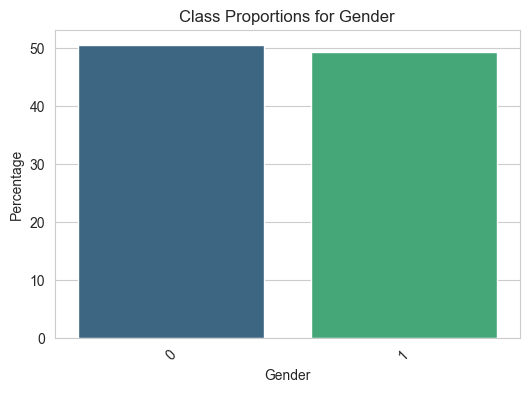

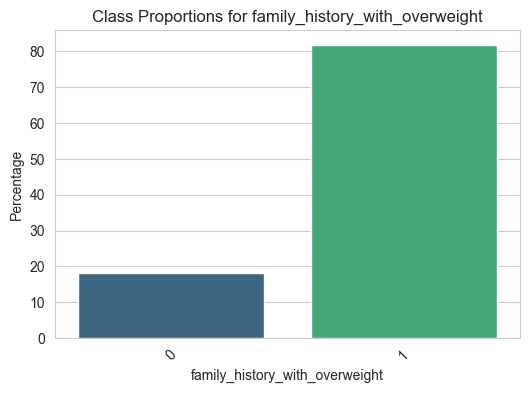

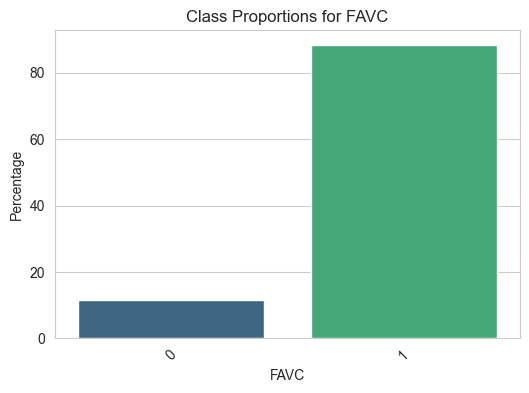

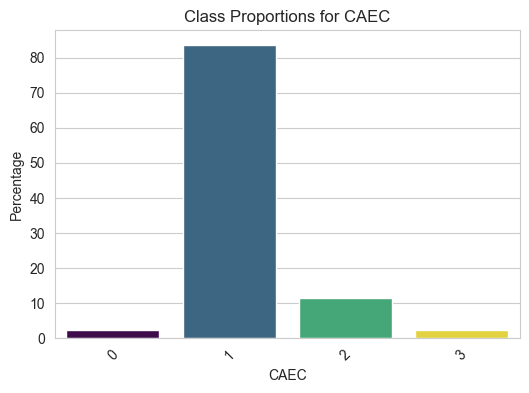

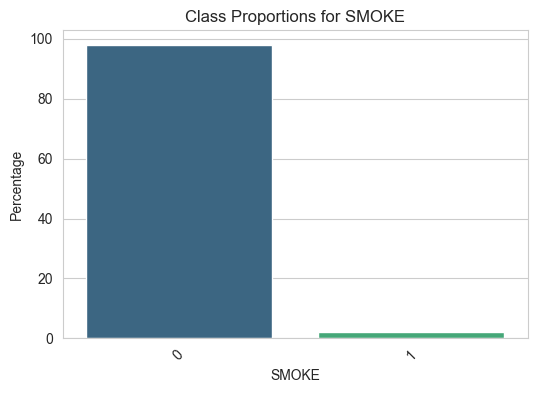

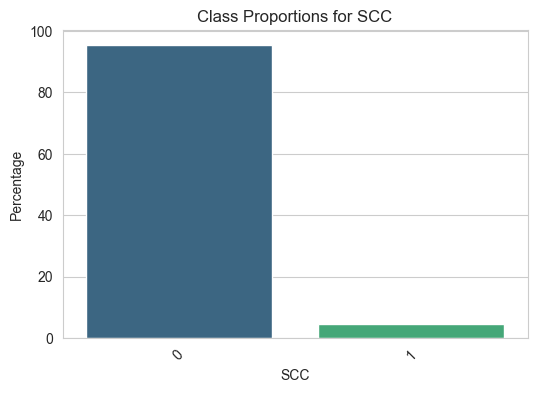

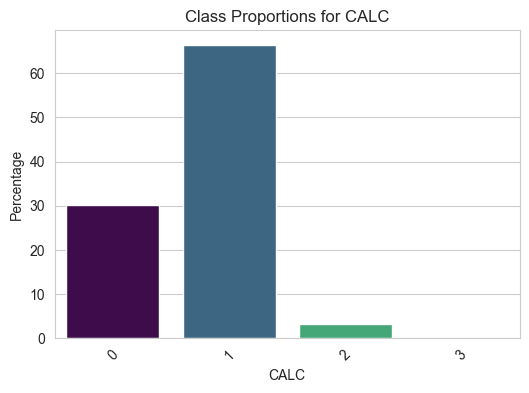

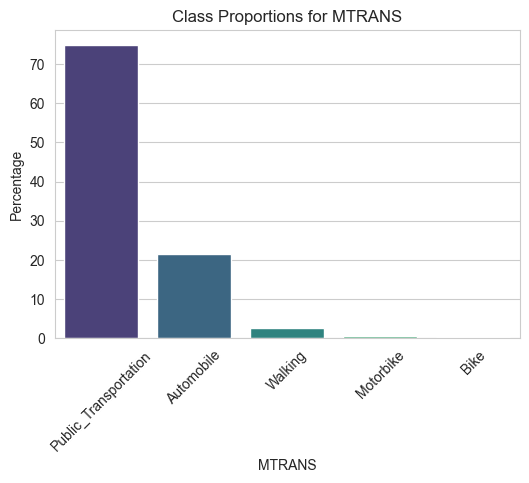

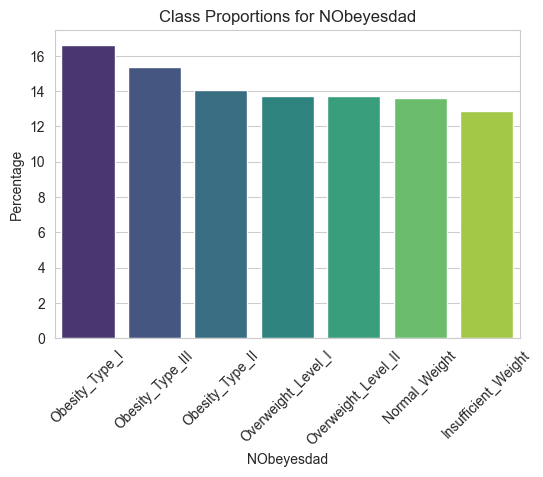

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=df[col].value_counts().index, 
                y=df[col].value_counts(normalize=True) * 100, 
                hue=df[col].value_counts().index, 
                legend=False,  # Hide legend since we already have x labels
                palette="viridis")
    plt.title(f"Class Proportions for {col}")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.savefig(f"figures/proportion/{col}.png")
    plt.show()



### 3. Categoric data encoding

As we have a lot of categoric columns with just 2 classes we can encode them as 0 and 1 for better analysis 

In [180]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].map({'yes': 1, 'no': 0})
df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].map({'yes': 1, 'no': 0})



Columns with more classes we can also try to encode to numeric like that

In [181]:
desired_order_obesity = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]

desired_order_frequency = [
    "no",
    "Sometimes",
    "Frequently",
    "Always"
]


# Encode 'NObeyesdad' using pandas Categorical
df["Obesity_Encoded"] = pd.Categorical(df["NObeyesdad"], categories=desired_order_obesity, ordered=True).codes
df["CALC"] = pd.Categorical(df["CALC"], categories=desired_order_frequency, ordered=True).codes
df["CAEC"] = pd.Categorical(df["CAEC"], categories=desired_order_frequency, ordered=True).codes

Now we can use seaborn tools etc. on more features as most of them work only on numeric data

### 4. Data visualization

Importing necessary libraries

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

#### 4.1 **Boxplots**

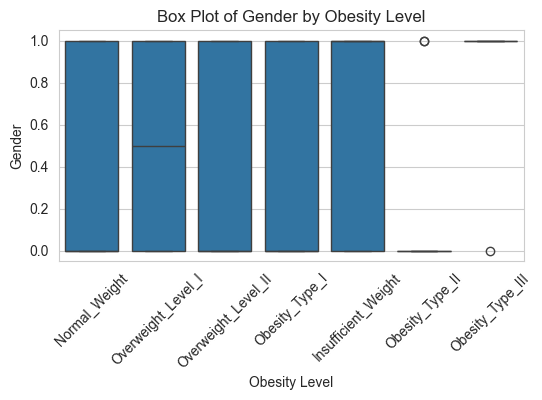

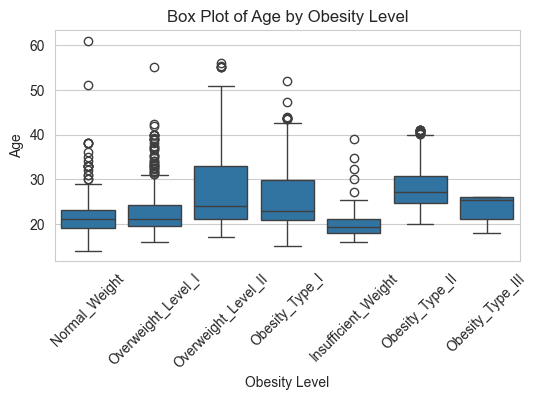

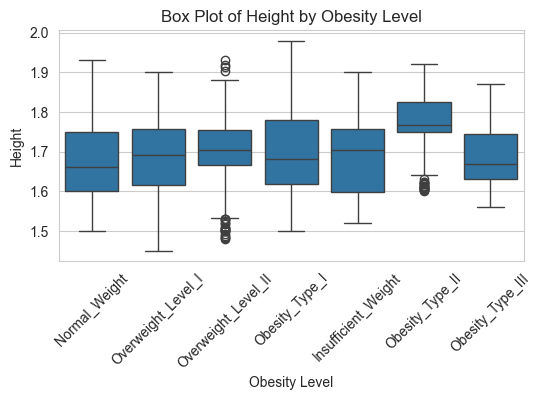

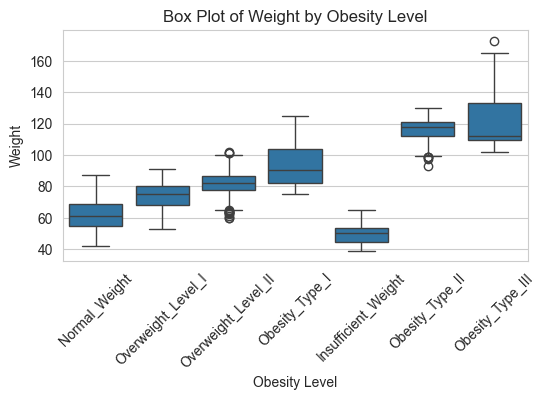

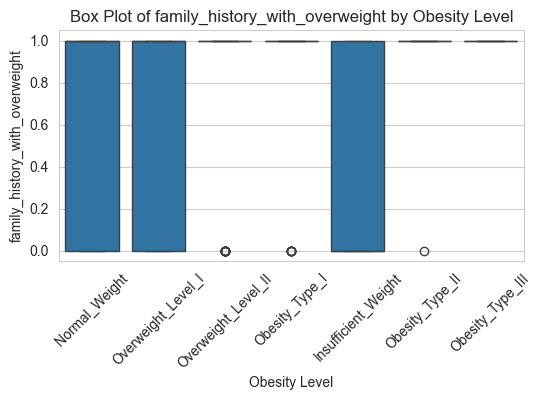

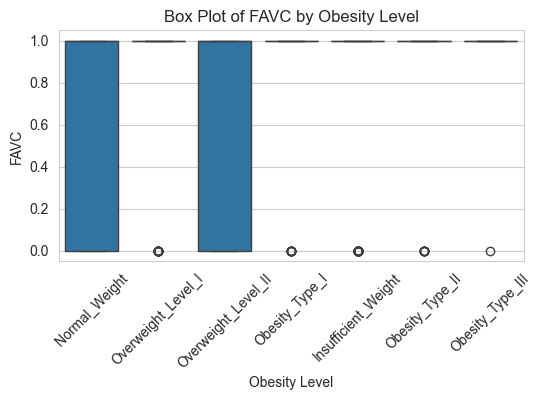

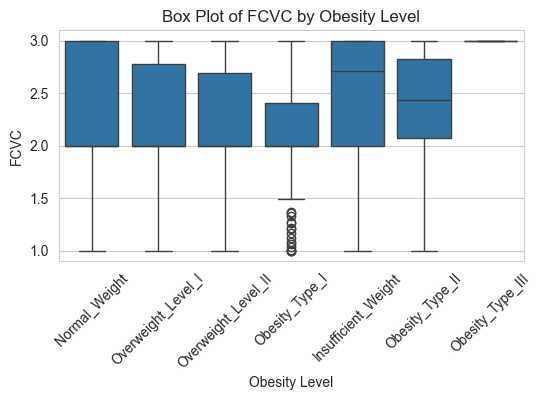

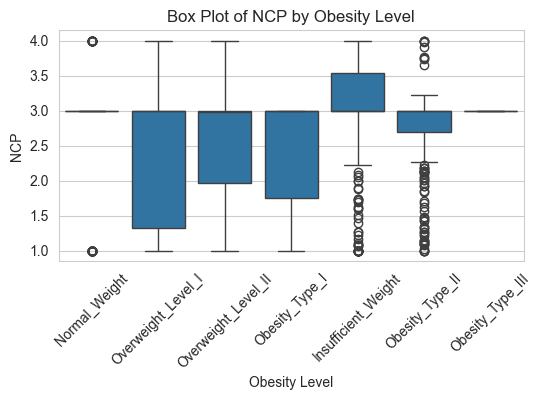

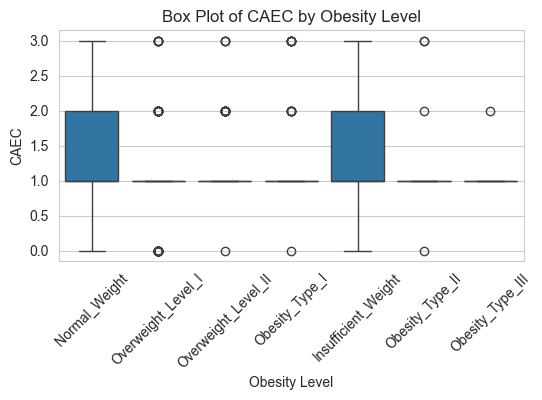

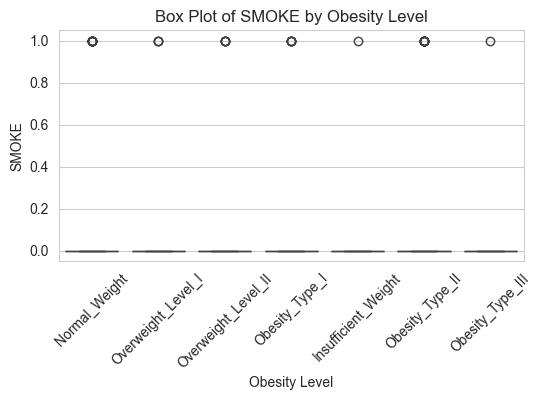

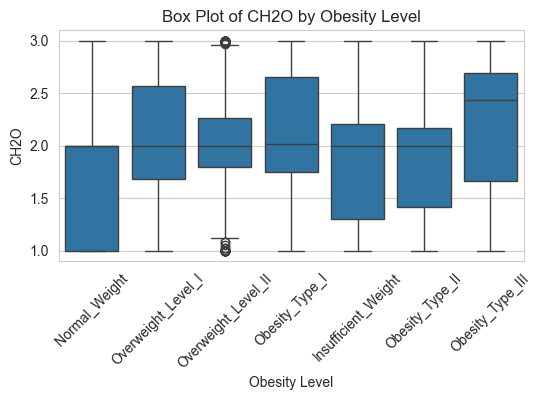

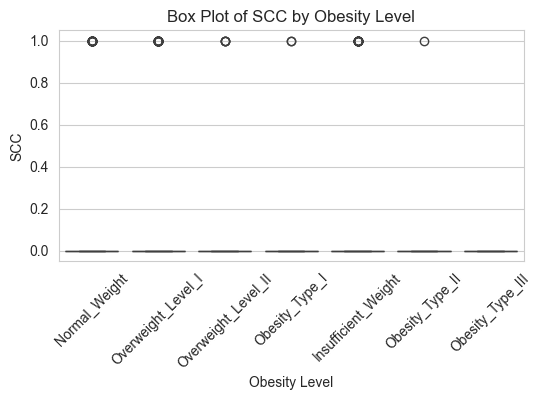

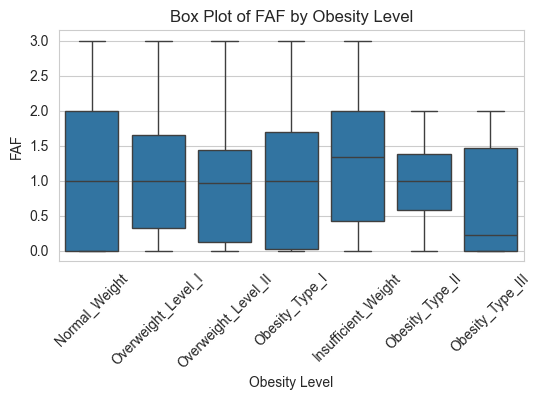

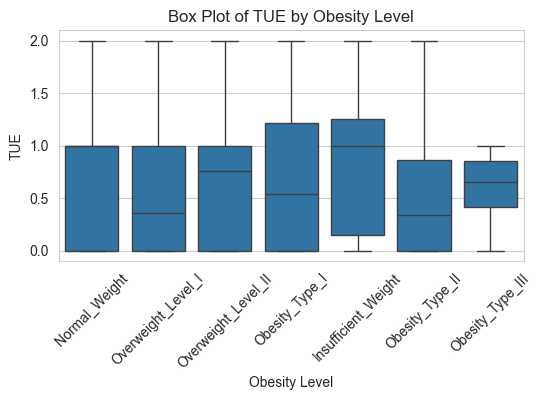

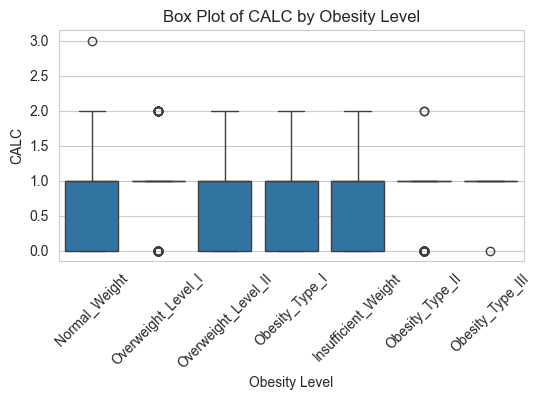

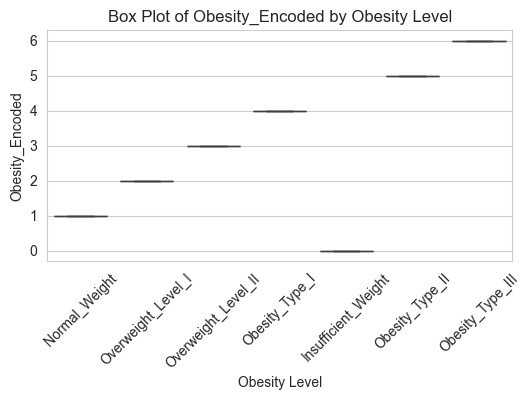

In [202]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Create box plots for each numeric column grouped by obesity level
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df["NObeyesdad"], y=df[col], data=df)
    plt.title(f"Box Plot of {col} by Obesity Level")
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.xlabel("Obesity Level")
    plt.ylabel(col)
    plt.savefig(f"figures/boxplots/{col}.png")
    plt.show()

#### 4.2 **Violinplots**

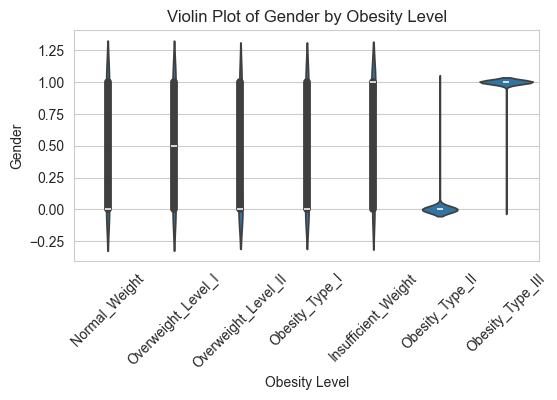

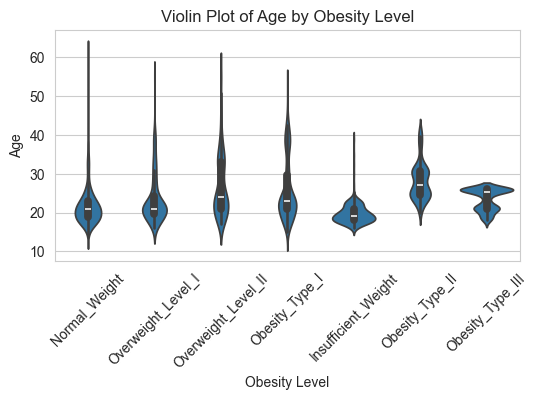

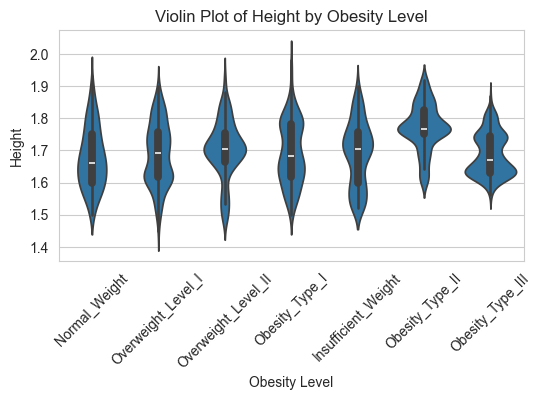

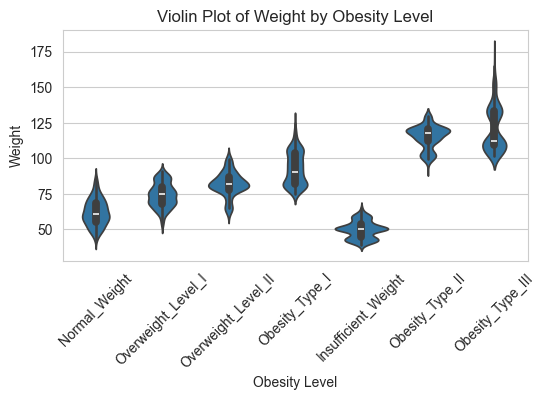

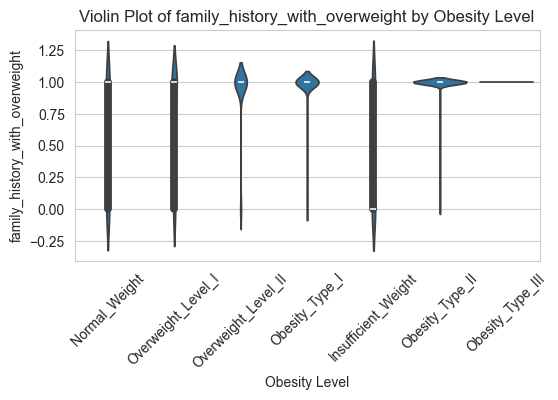

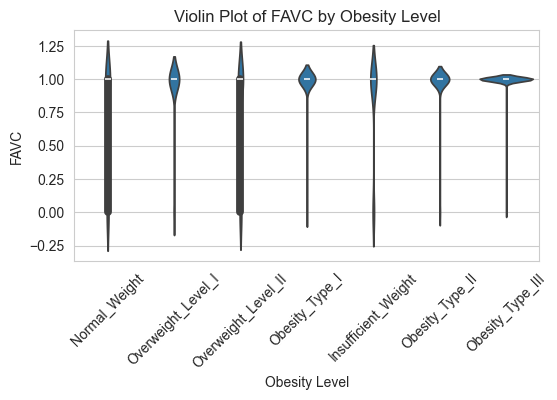

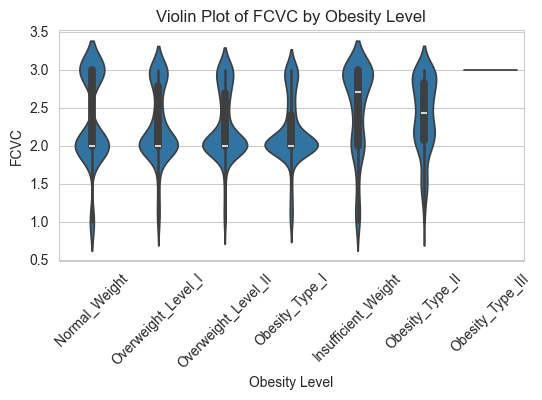

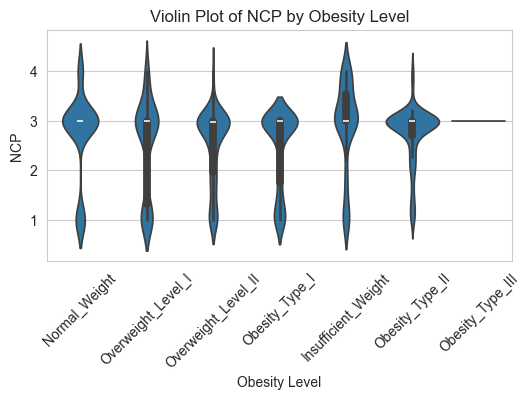

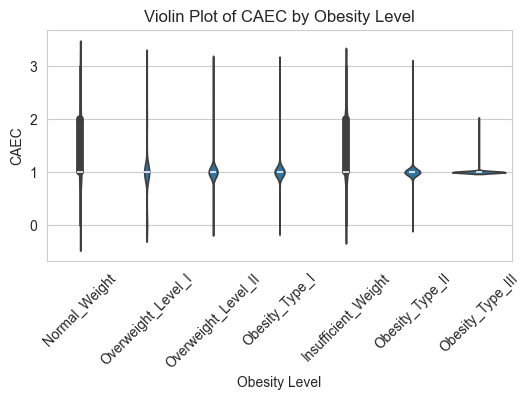

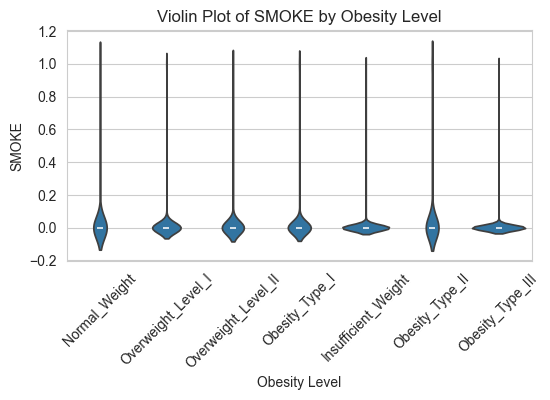

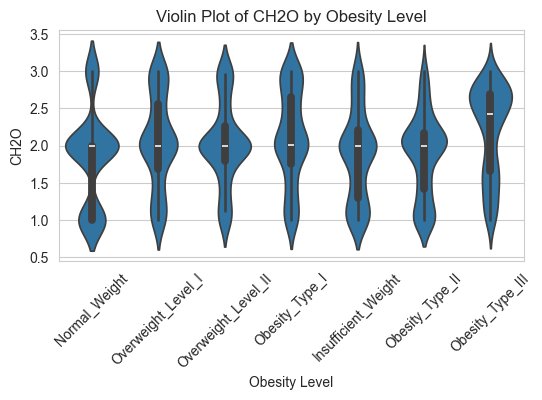

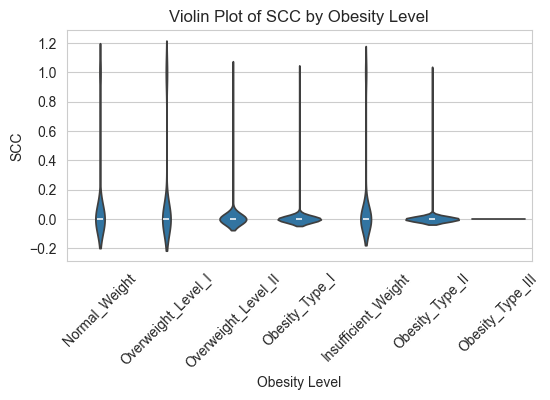

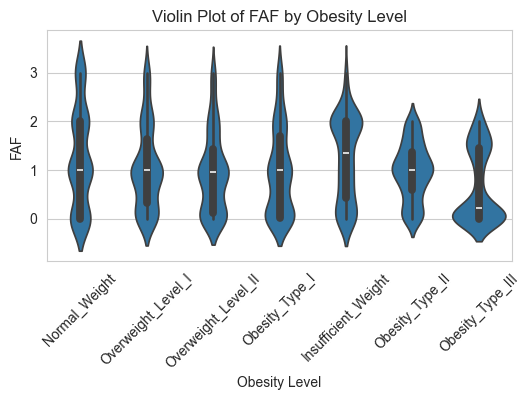

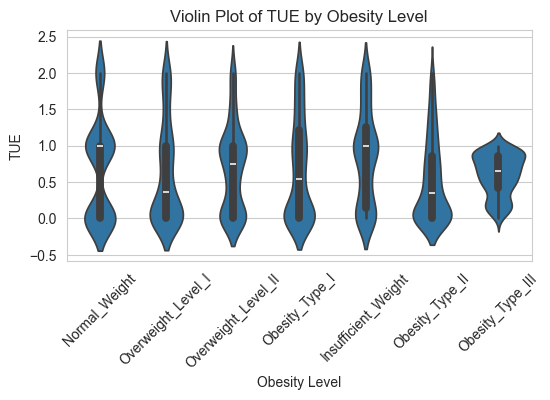

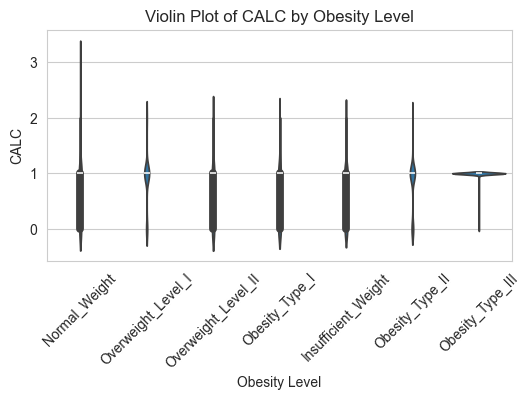

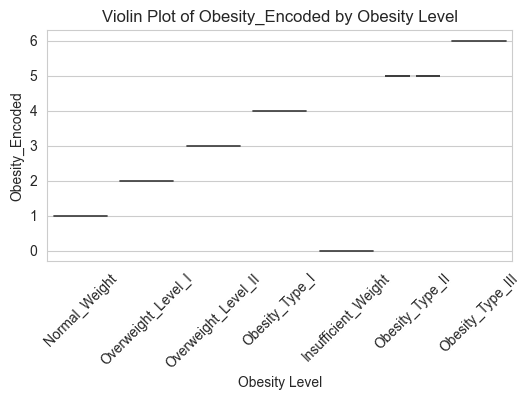

In [203]:
# Create violin plots for each numeric column grouped by obesity level
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.violinplot(x=df["NObeyesdad"], y=df[col], data=df)
    plt.title(f"Violin Plot of {col} by Obesity Level")
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.xlabel("Obesity Level")
    plt.ylabel(col)
    plt.savefig(f"figures/violinplots/{col}.png")
    plt.show()

#### 4.3 **Error bars**

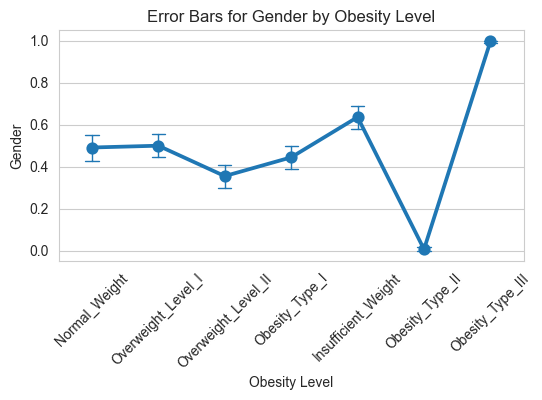

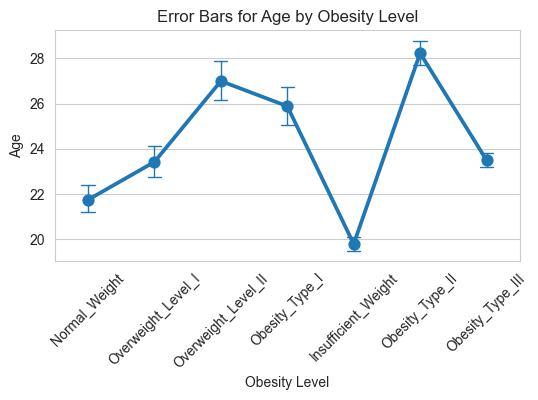

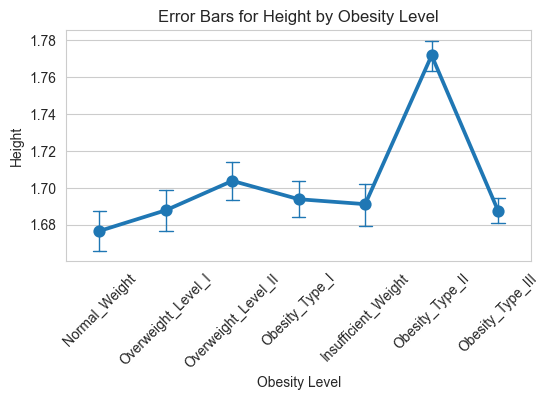

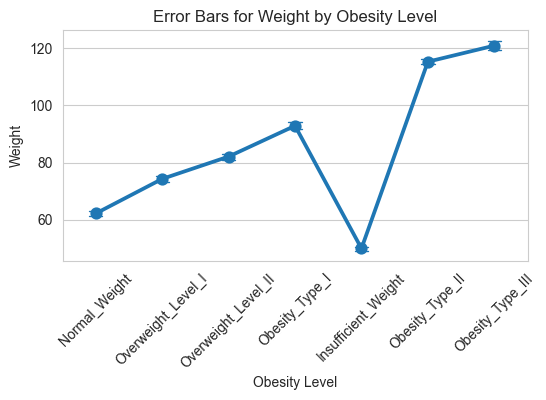

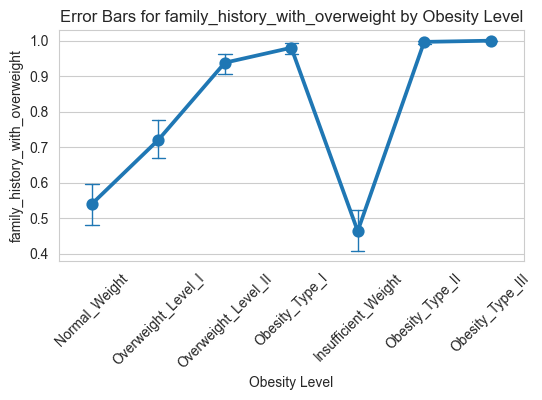

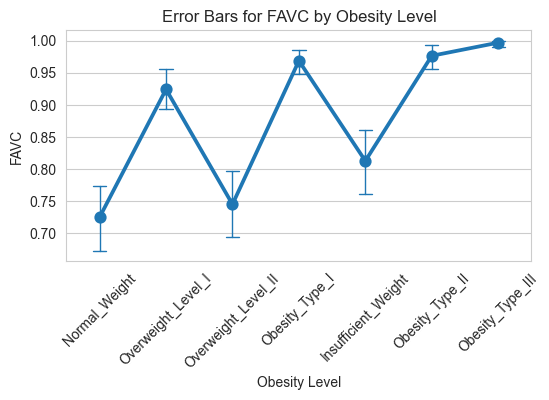

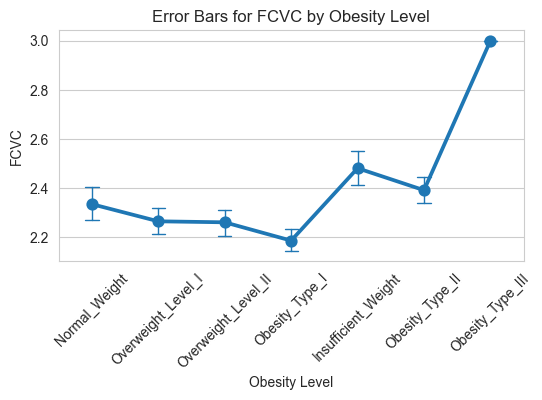

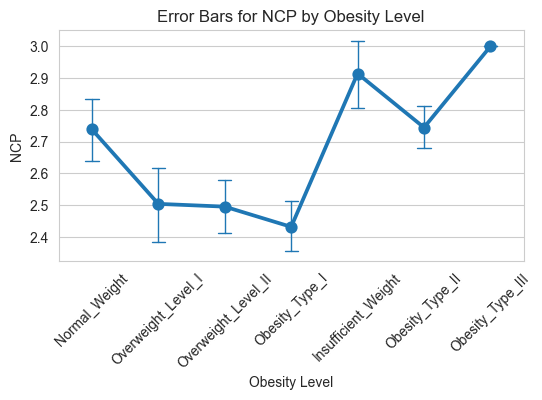

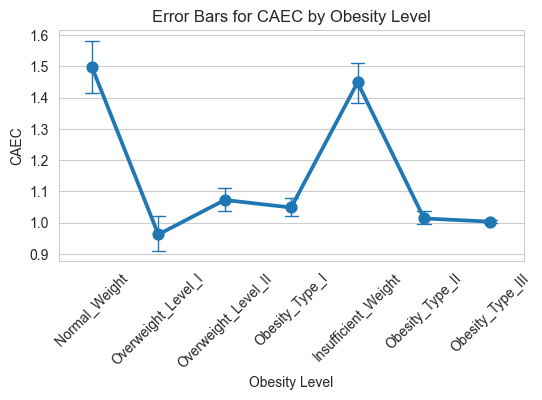

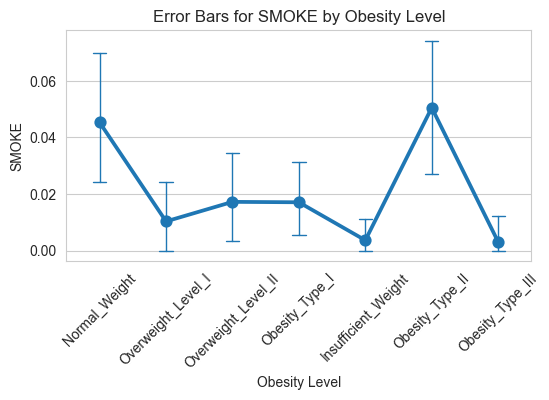

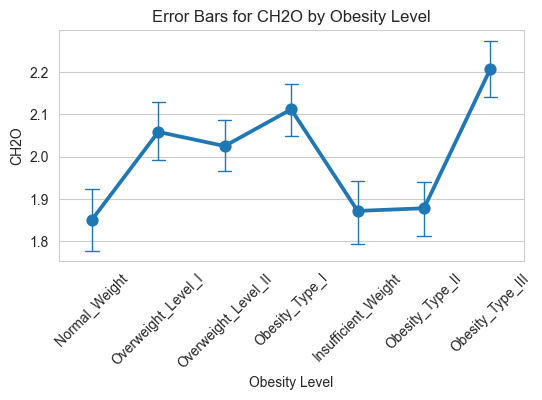

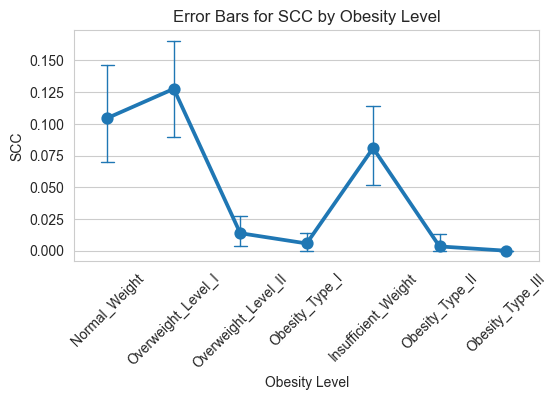

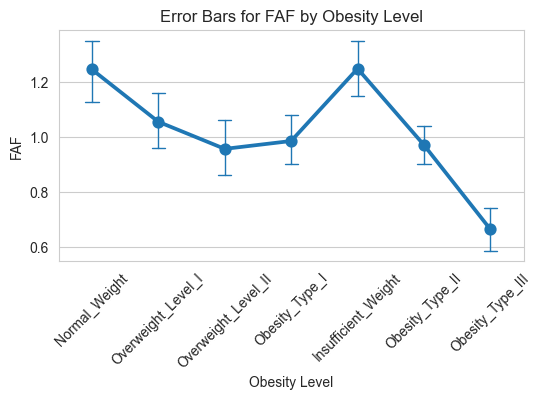

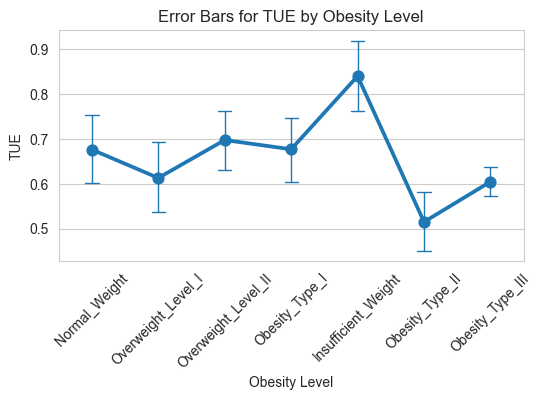

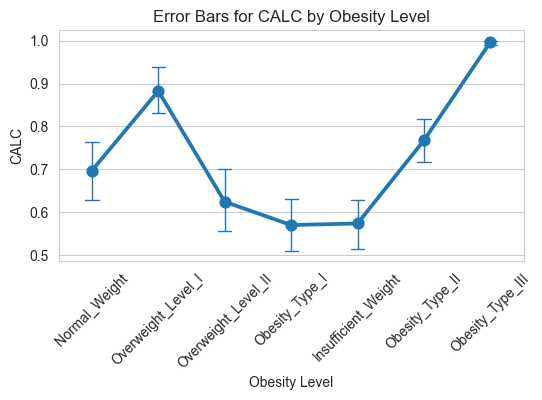

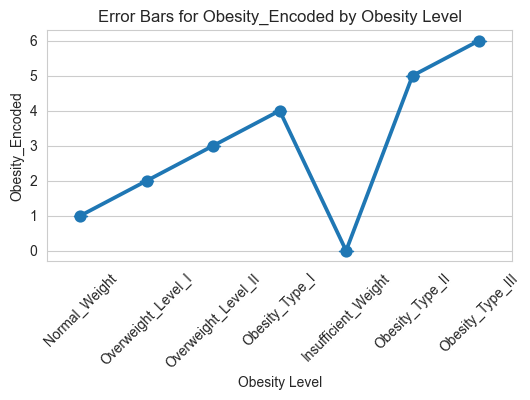

In [204]:
# Create error bar plots for each numeric column grouped by obesity level
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.pointplot(
        x=df["NObeyesdad"], y=df[col], data=df, 
        errorbar=("ci", 95),  # 0.95 confidence interval
        capsize=0.2, 
        err_kws={"linewidth": 1} 
    )
    plt.title(f"Error Bars for {col} by Obesity Level")
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.xlabel("Obesity Level")
    plt.ylabel(col)
    plt.savefig(f"figures/errorbars/{col}.png")
    plt.show()

#### 4.4 **Histograms**

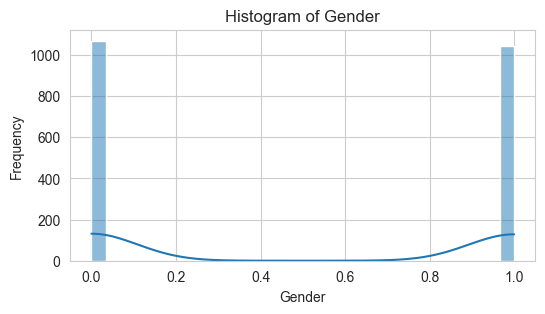

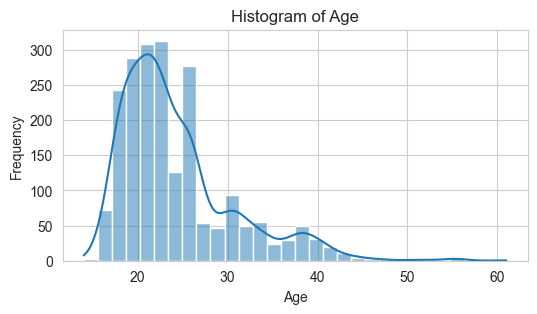

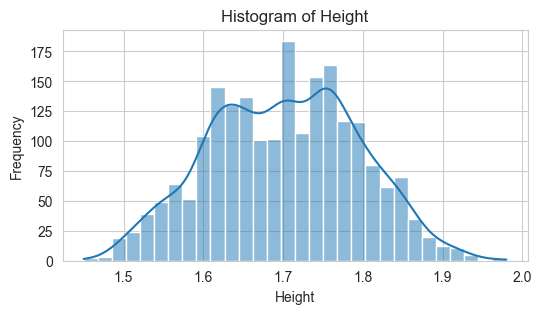

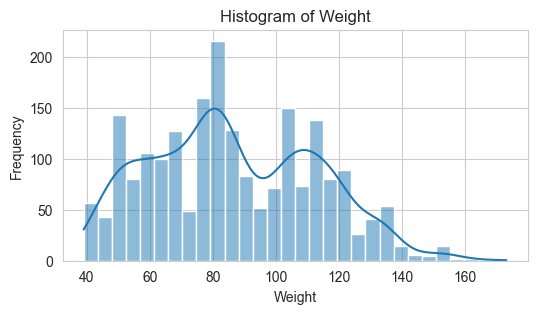

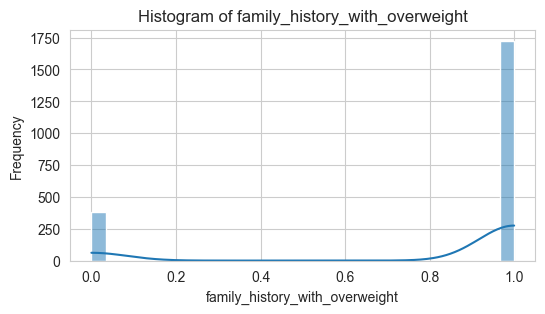

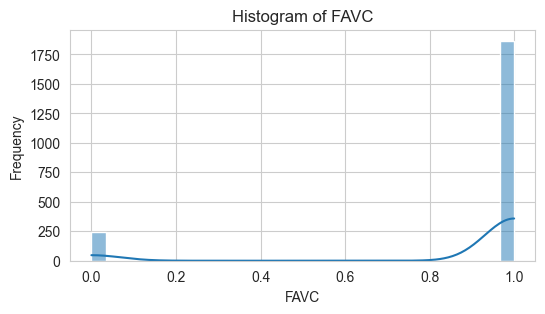

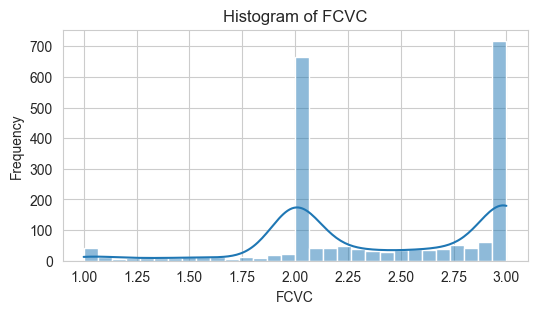

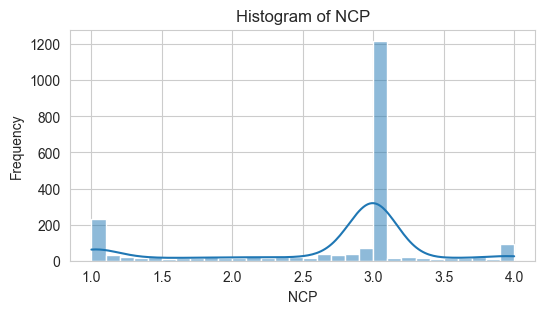

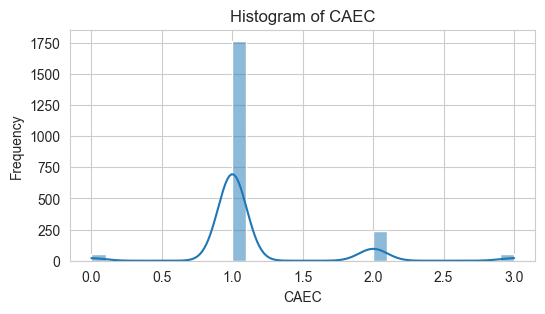

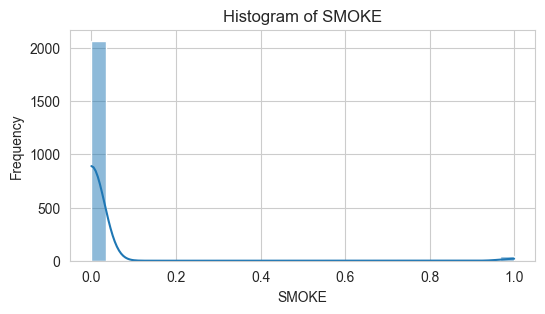

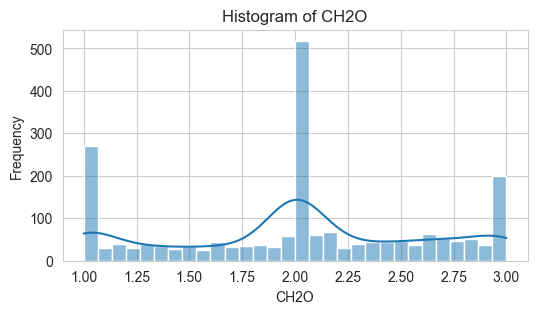

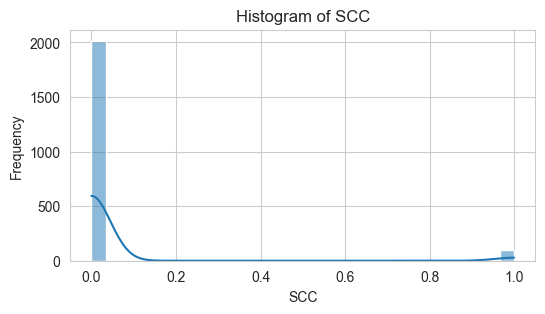

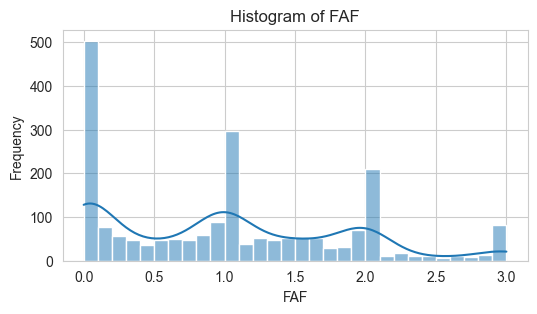

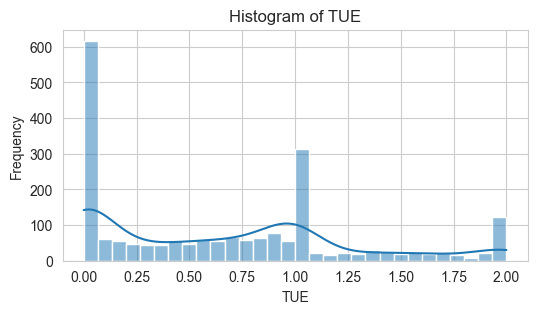

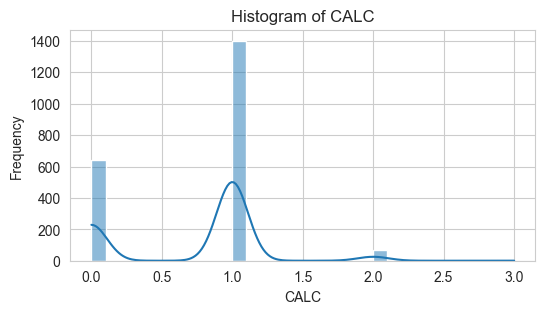

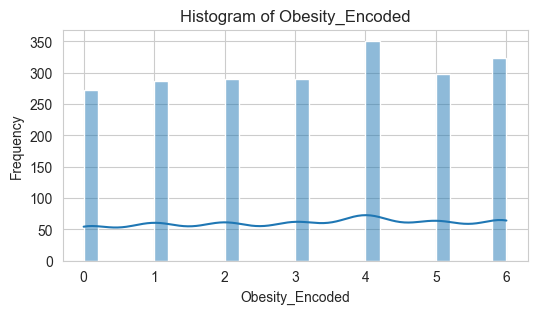

In [205]:
# Create histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=30, kde=True)  # Histogram with KDE (density curve)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f"figures/histograms/{col}.png")
    plt.show()

#### 4.5 **Conditional histograms**

for each numerical column by obesity level

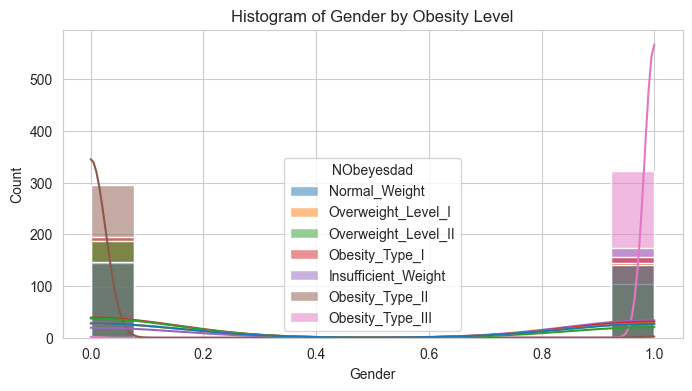

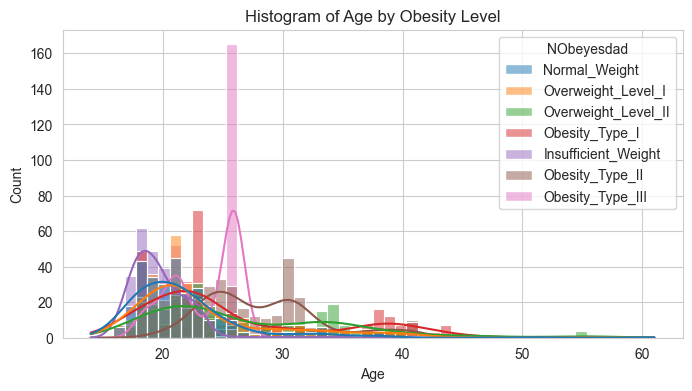

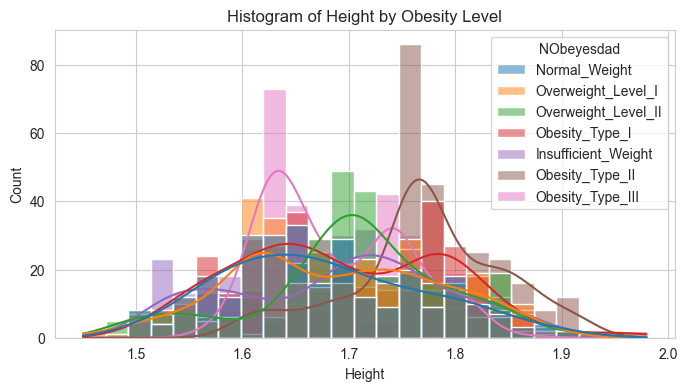

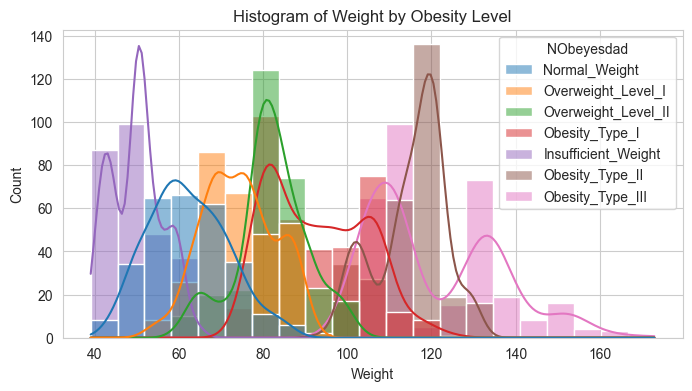

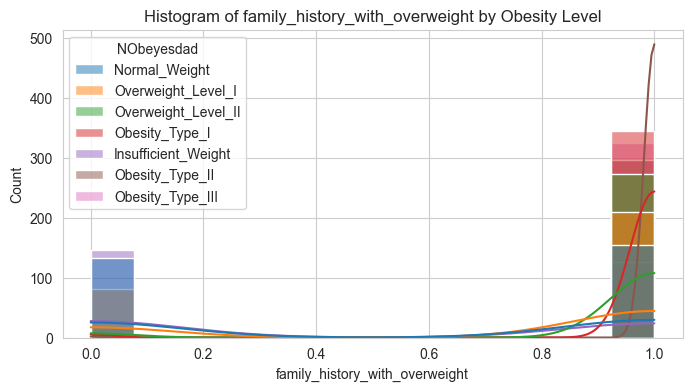

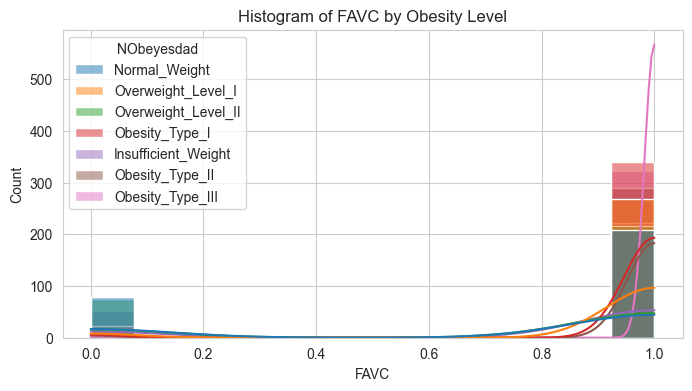

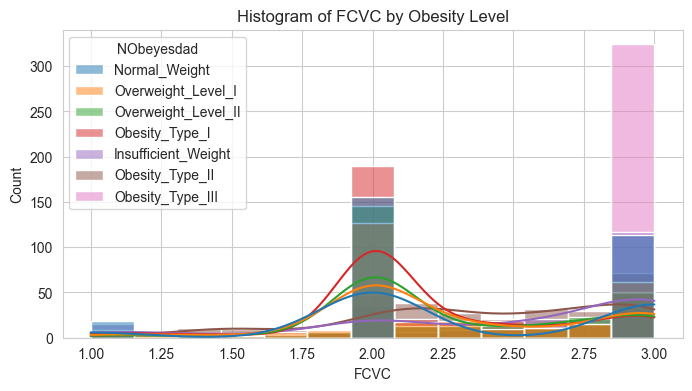

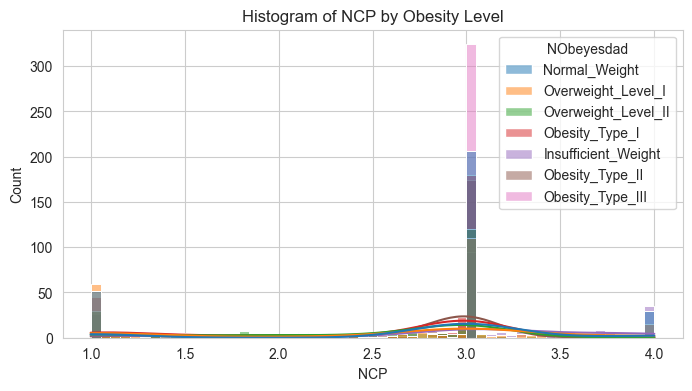

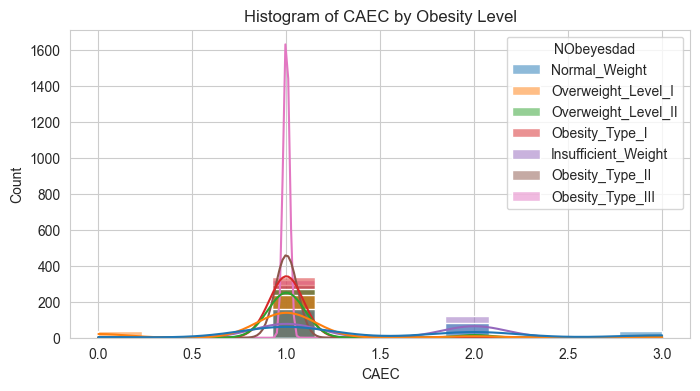

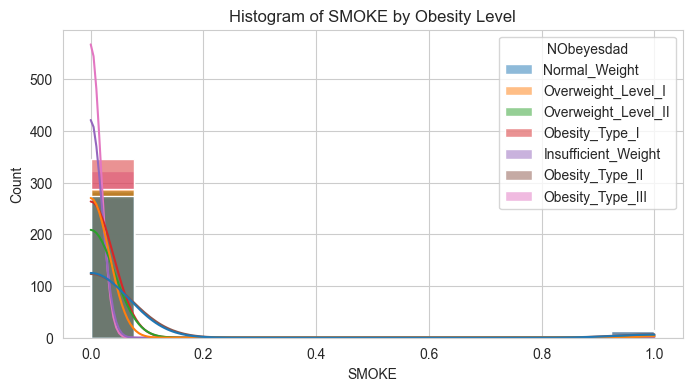

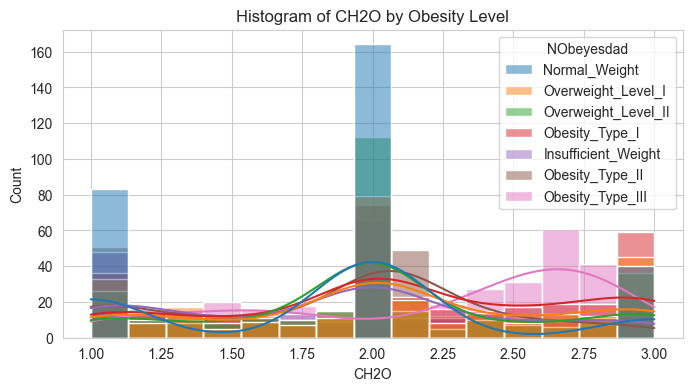

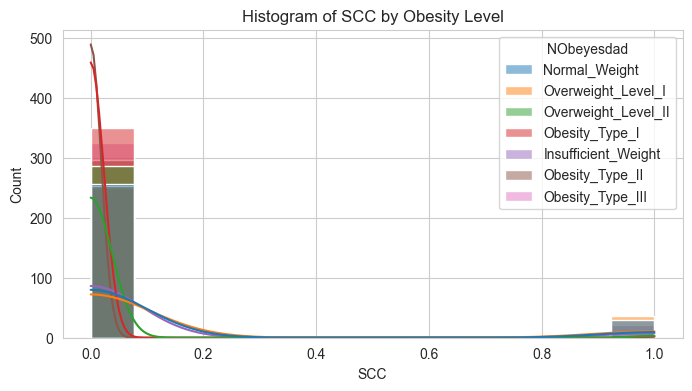

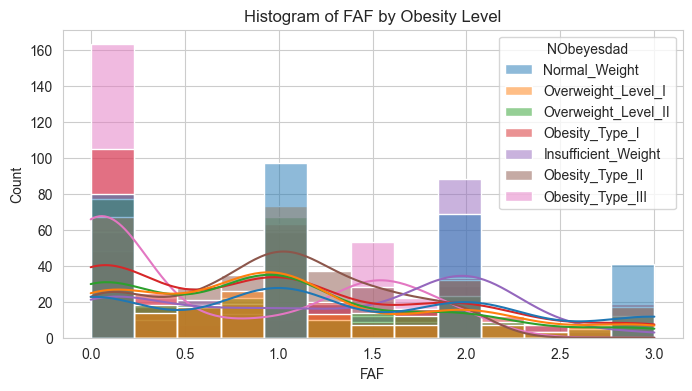

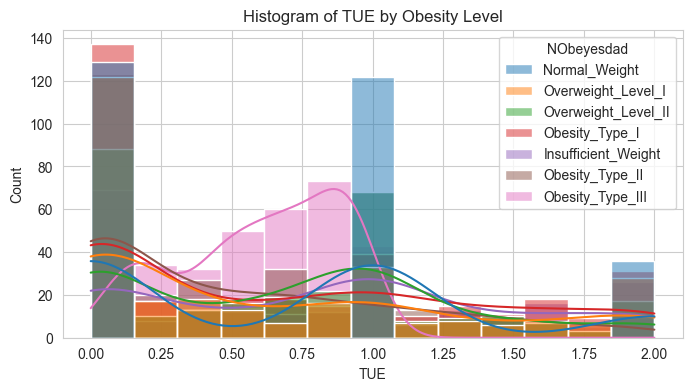

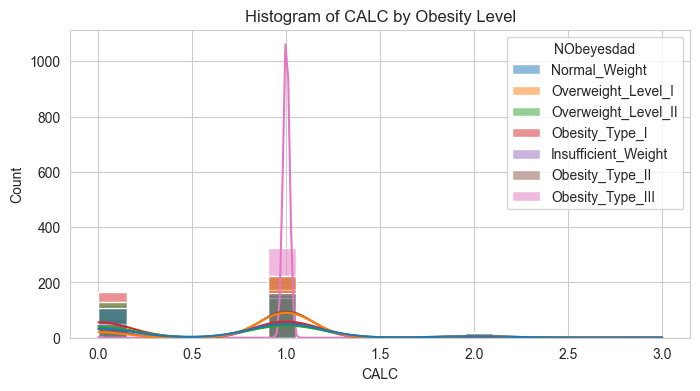

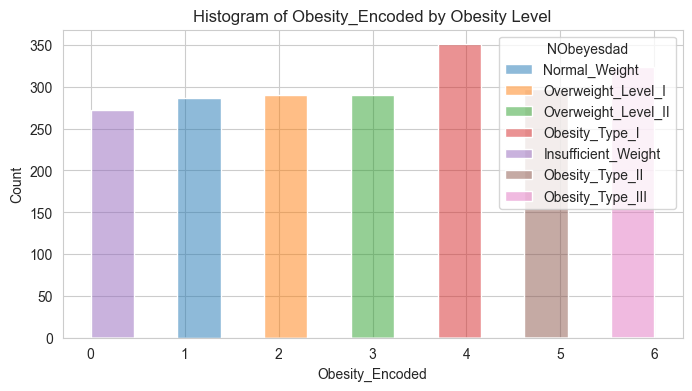

In [206]:
# Create histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df, x=df[col], hue="NObeyesdad", kde=True)  # Histogram with KDE (density curve)
    plt.title(f"Histogram of {col} by Obesity Level")
    plt.savefig(f"figures/conditional_his/{col}.png")
    plt.show()

#### 4.6 **Correlation heatmap**

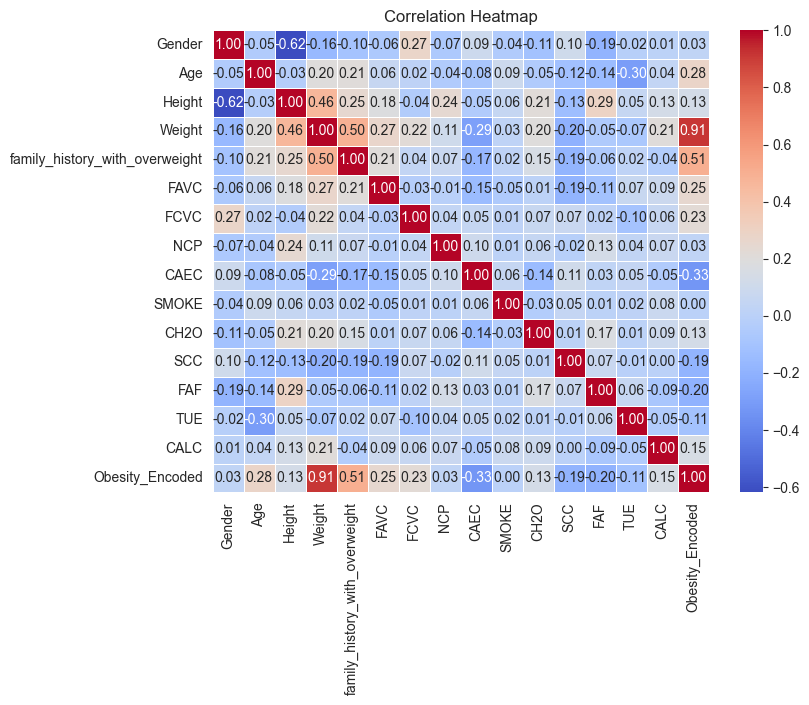

In [ ]:
# Compute correlation matrix (only for numeric columns)
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.savefig("figures/heatmap.png")
plt.show()


### 5. Non numeric data

the only feature that I couldn't encode was mean of transportation as it is really hard to define any particular order of this classes (where in time frequency it was pretty obvious)

therefore the correlation of this feature and obesity is shown below

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['MTRANS'], df['NObeyesdad'])

# Display the contingency table
print(contingency_table)


NObeyesdad             Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
MTRANS                                                                      
Automobile                              46             45             110   
Bike                                     0              4               0   
Motorbike                                0              6               3   
Public_Transportation                  220            200             236   
Walking                                  6             32               2   

NObeyesdad             Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
MTRANS                                                                         
Automobile                          95                 1                  66   
Bike                                 1                 0                   2   
Motorbike                            0                 0                   1   
Public_Transportation              200               323    

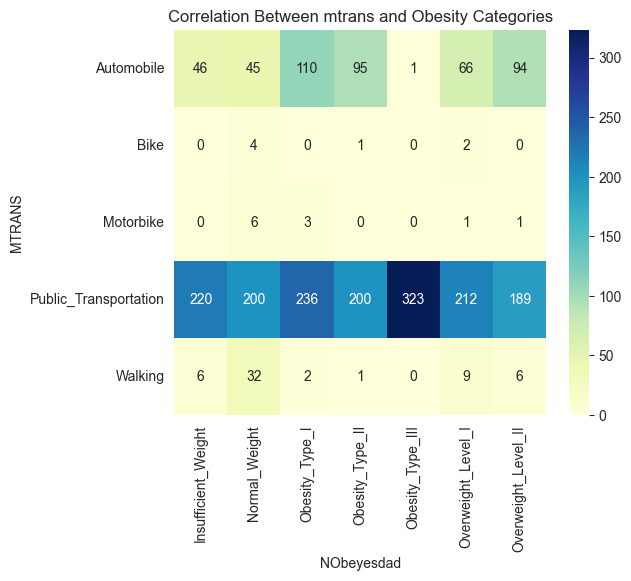

In [208]:
# Plot the heatmap of the contingency table
plt.figure(figsize=(6, 5))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Correlation Between mtrans and Obesity Categories")
plt.savefig("figures/mtrans_heatmap.png")
plt.show()


### 6. Regression analysis

<Figure size 800x500 with 0 Axes>

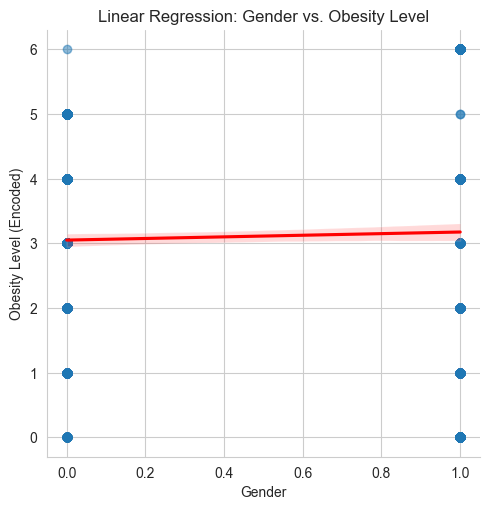

<Figure size 800x500 with 0 Axes>

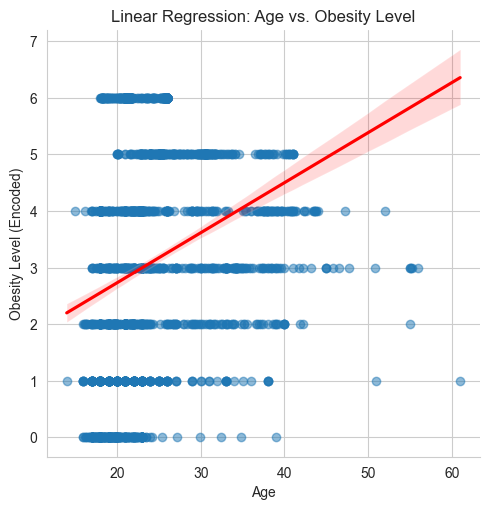

<Figure size 800x500 with 0 Axes>

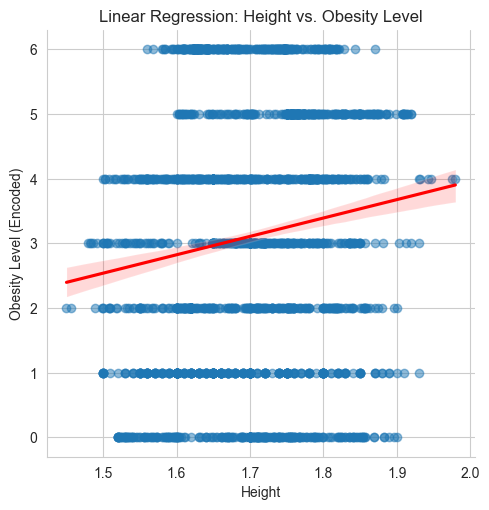

<Figure size 800x500 with 0 Axes>

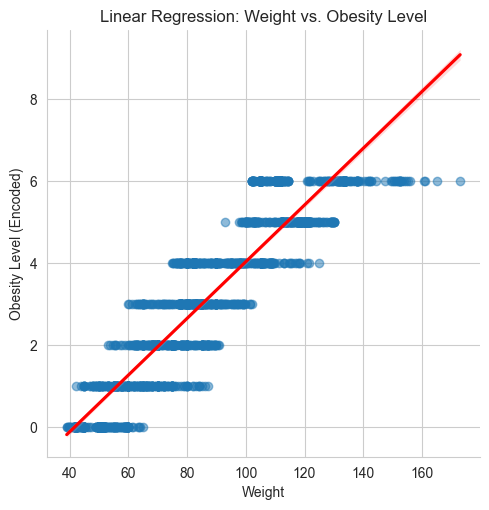

<Figure size 800x500 with 0 Axes>

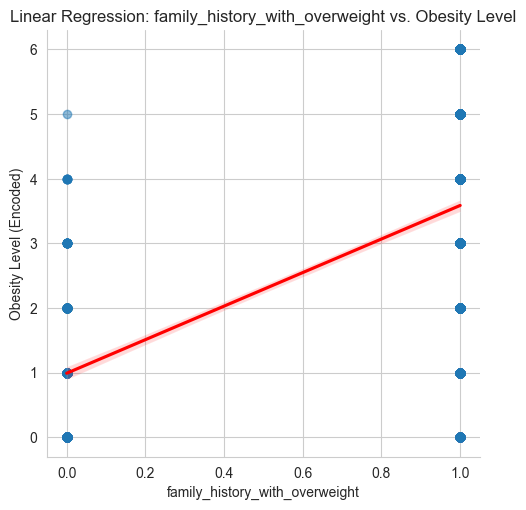

<Figure size 800x500 with 0 Axes>

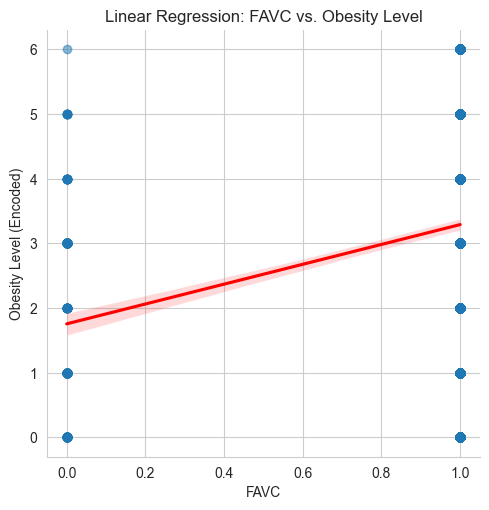

<Figure size 800x500 with 0 Axes>

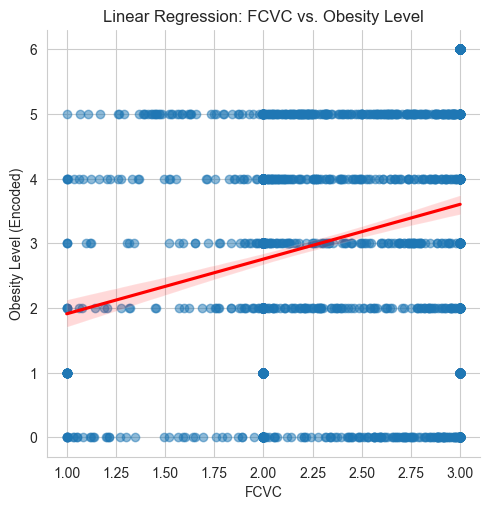

<Figure size 800x500 with 0 Axes>

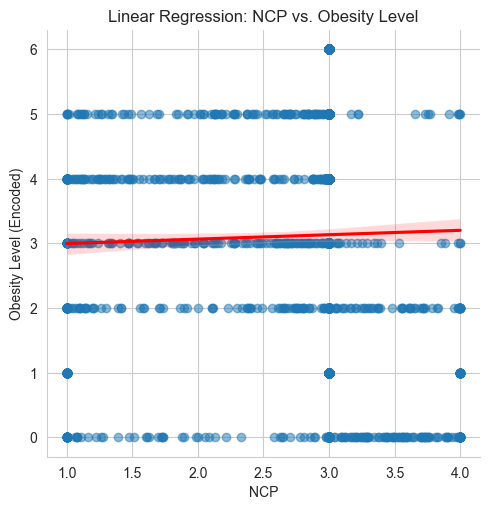

<Figure size 800x500 with 0 Axes>

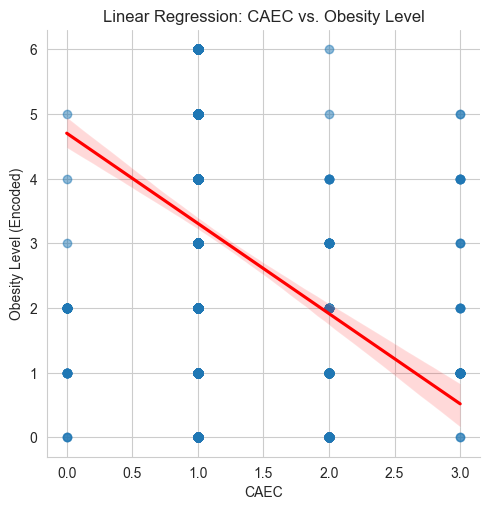

<Figure size 800x500 with 0 Axes>

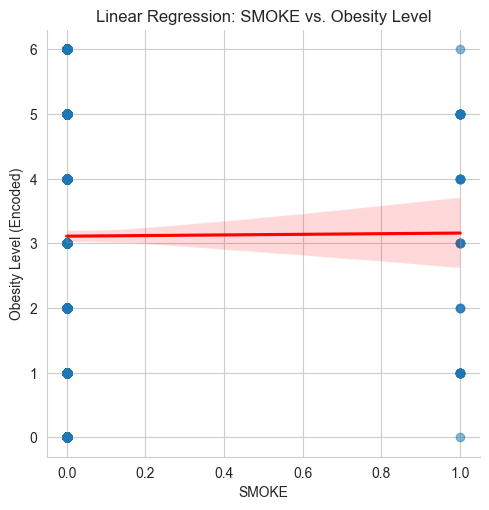

<Figure size 800x500 with 0 Axes>

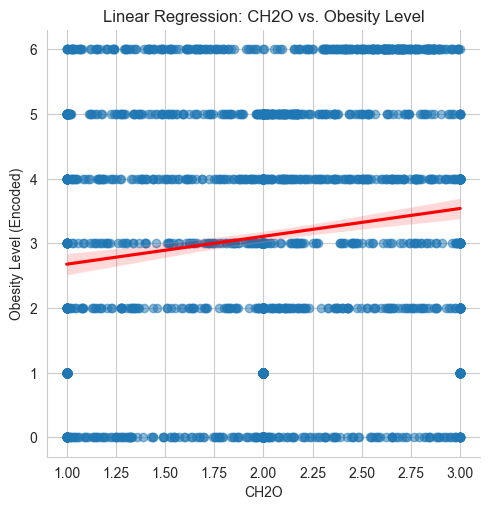

<Figure size 800x500 with 0 Axes>

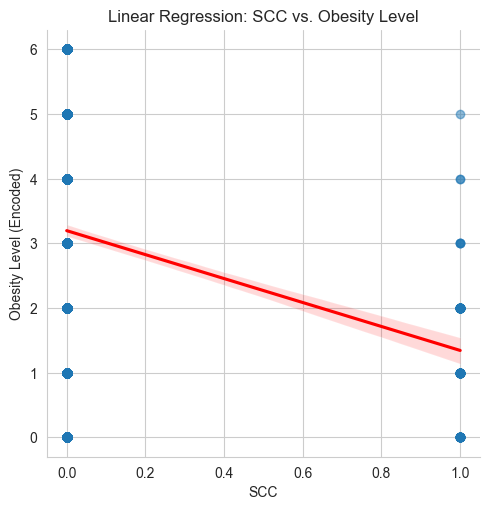

<Figure size 800x500 with 0 Axes>

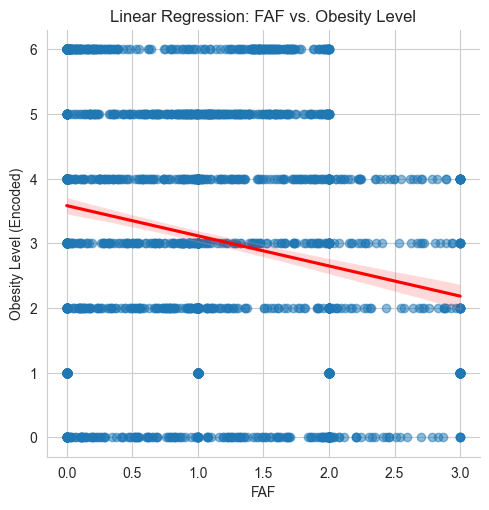

<Figure size 800x500 with 0 Axes>

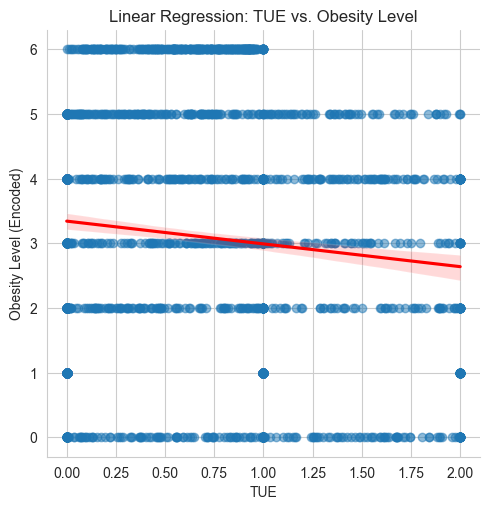

<Figure size 800x500 with 0 Axes>

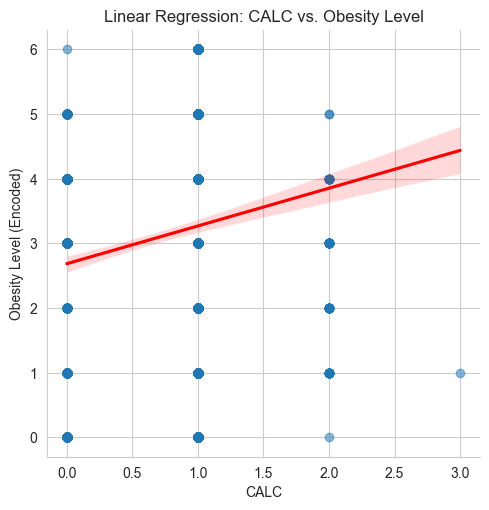

<Figure size 800x500 with 0 Axes>

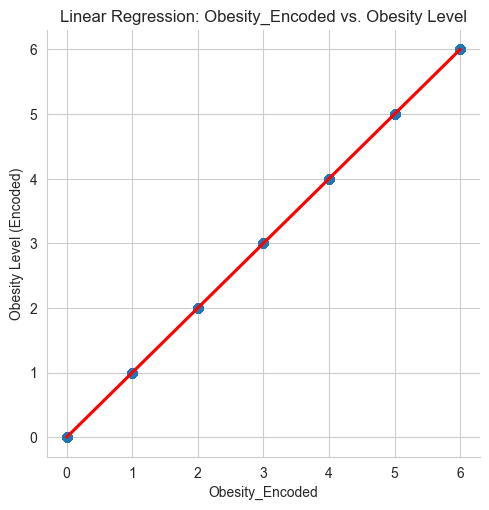

In [210]:
# Regression plots for each numeric feature vs. encoded obesity level
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.lmplot(data=df, x=col, y="Obesity_Encoded", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Linear Regression: {col} vs. Obesity Level")
    plt.xlabel(col)
    plt.ylabel("Obesity Level (Encoded)")
    plt.savefig(f"figures/regression/{col}.png")
    plt.show()


### 7 Data visualization using dimensionality reduction

#### 7.1 Data visualization with PCA

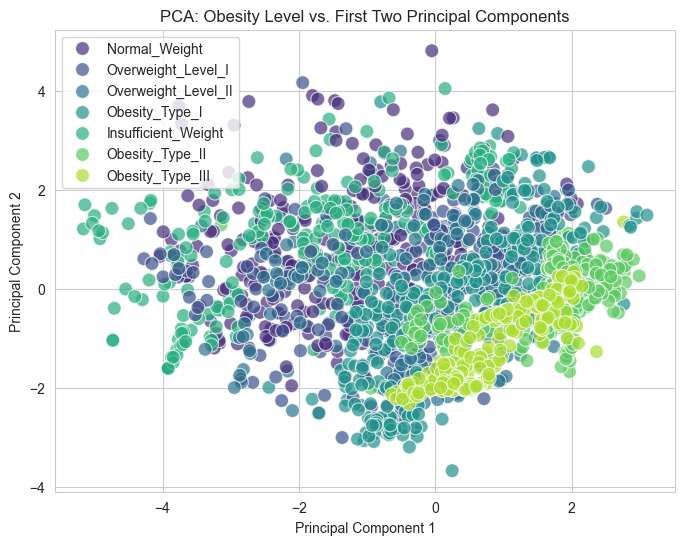

In [218]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
features = numeric_cols.tolist()
features.remove('Obesity_Encoded') # we take all numeric features except the encoded obesity

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=pca_components, columns=["PCA1", "PCA2"])

# Add the obesity categories for coloring
df_pca["Obesity_Level"] = df["NObeyesdad"].values

# Plot the PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PCA1", y="PCA2", hue="Obesity_Level", palette="viridis", s=100, alpha=0.7)
plt.title("PCA: Obesity Level vs. First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("figures/pca.png")
plt.show()


#### 7.2 Data visualization with t-SNE

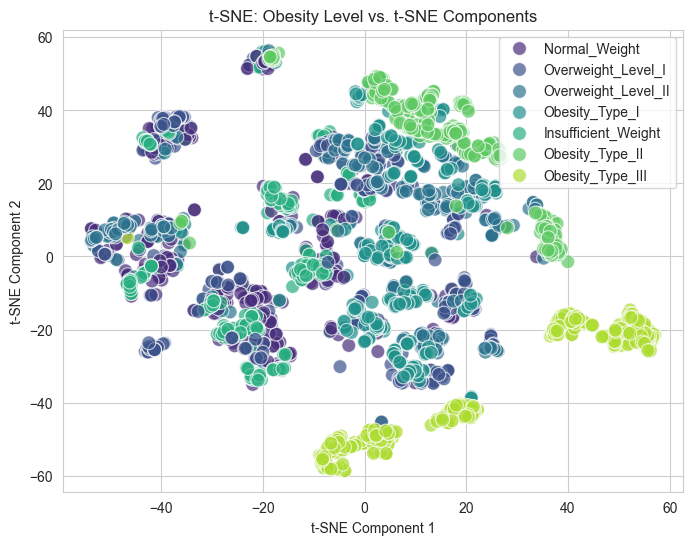

In [220]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 components
tsne_components = tsne.fit_transform(X_scaled)

# Create a DataFrame for the t-SNE results
df_tsne = pd.DataFrame(data=tsne_components, columns=["tSNE1", "tSNE2"])

# Add the obesity categories for coloring
df_tsne["Obesity_Level"] = df["NObeyesdad"].values

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="tSNE1", y="tSNE2", hue="Obesity_Level", palette="viridis", s=100, alpha=0.7)
plt.title("t-SNE: Obesity Level vs. t-SNE Components")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.savefig("figures/tsne.png")
plt.show()
